In [1]:
import numpy as np

# Generate a legendre basis of size `size`
def legendre_basis(size):
    basis = []
    for i in range(size):
        coeffs = np.zeros(size)
        coeffs[i] = 1
        basis.append(np.polynomial.legendre.Legendre(coeffs))
    return basis

In [2]:
# Generate the Aliasing Operator norm plot as we move each next basis function into the modeled space.

def aliasing_operator(basis_functions, sample_points, model_size: int) -> tuple[np.ndarray, float]:
    """
    Given a set of basis functions and sample points, compute the aliasing operator A and its 2-norm.

    Parameters:
    - basis_functions: List of callable basis functions.
    - sample_points: Array of sample points where the basis functions are evaluated.
    - model_size: Number of basis functions to consider as modeled (the rest are unmode
    led).
    """
    # M_top = [M_TM | M_TU]
    M_top_half = np.array([p(sample_points) for p in basis_functions]).T # so that rows are sample points, cols are basis functions

    M_TM, M_TU = M_top_half[:,:model_size], M_top_half[:,model_size:]
    M_TM_plus = np.linalg.pinv(M_TM)

    # A = M_TM^+ @ M_TU
    return (A := M_TM_plus @ M_TU), np.linalg.norm(A, ord=2).astype(float)



In [12]:
import matplotlib.pyplot as plt

m = 150  # Total number of basis functions (Modeled + Unmodeled)
n = 250
complete_legendre_basis = legendre_basis(m)  # Full basis

modeled_functions = m-50  # Pick a number of fixed modeled basis functions


norms_uniform_seed_0 = []
norms_uniform_seed_1 = []
norms_uniform_seed_2 = []
norms_uniform_seed_3 = []


norms_legendre = []
norms_regular = []


for n in range(1, n+1):
    # Pick Uniformly random points to sample our basis at
    np.random.seed(0)
    uniform_points_seed_0 = np.random.uniform(-1, 1, n)
    np.random.seed(1)
    uniform_points_seed_1 = np.random.uniform(-1, 1, n)
    np.random.seed(2)
    uniform_points_seed_2 = np.random.uniform(-1, 1, n)
    np.random.seed(3)
    uniform_points_seed_3 = np.random.uniform(-1, 1, n)



    # Pick Legendre-Gauss points to sample our basis at
    legendre_gauss_points, _ = np.polynomial.legendre.leggauss(n)

    # Compute the aliasing operator and its norm for both sampling strategies
    _, norm_uniform_seed_0 = aliasing_operator(complete_legendre_basis, uniform_points_seed_0, model_size=modeled_functions)
    _, norm_uniform_seed_1 = aliasing_operator(complete_legendre_basis, uniform_points_seed_1, model_size=modeled_functions)
    _, norm_uniform_seed_2 = aliasing_operator(complete_legendre_basis, uniform_points_seed_2, model_size=modeled_functions)
    _, norm_uniform_seed_3 = aliasing_operator(complete_legendre_basis, uniform_points_seed_3, model_size=modeled_functions)

    _, norm_legendre = aliasing_operator(complete_legendre_basis, legendre_gauss_points, model_size=modeled_functions)
    _, norm_regular = aliasing_operator(complete_legendre_basis, np.linspace(-1, 1, n), model_size=modeled_functions)

    norms_uniform_seed_0.append(norm_uniform_seed_0)
    norms_uniform_seed_1.append(norm_uniform_seed_1)
    norms_uniform_seed_2.append(norm_uniform_seed_2)
    norms_uniform_seed_3.append(norm_uniform_seed_3)

    norms_legendre.append(norm_legendre)
    norms_regular.append(norm_regular)
    print(f"n={n}")

n=1
n=2
n=3
n=4
n=5
n=6
n=7
n=8
n=9
n=10
n=11
n=12
n=13
n=14
n=15
n=16
n=17
n=18
n=19
n=20
n=21
n=22
n=23
n=24
n=25
n=26
n=27
n=28
n=29
n=30
n=31
n=32
n=33
n=34
n=35
n=36
n=37
n=38
n=39
n=40
n=41
n=42
n=43
n=44
n=45
n=46
n=47
n=48
n=49
n=50
n=51
n=52
n=53
n=54
n=55
n=56
n=57
n=58
n=59
n=60
n=61
n=62
n=63
n=64
n=65
n=66
n=67
n=68
n=69
n=70
n=71
n=72
n=73
n=74
n=75
n=76
n=77
n=78
n=79
n=80
n=81
n=82
n=83
n=84
n=85
n=86
n=87
n=88
n=89
n=90
n=91
n=92
n=93
n=94
n=95
n=96
n=97
n=98
n=99
n=100
n=101
n=102
n=103
n=104
n=105
n=106
n=107
n=108
n=109
n=110
n=111
n=112
n=113
n=114
n=115
n=116
n=117
n=118
n=119
n=120
n=121
n=122
n=123
n=124
n=125
n=126
n=127
n=128
n=129
n=130
n=131
n=132
n=133
n=134
n=135
n=136
n=137
n=138
n=139
n=140
n=141
n=142
n=143
n=144
n=145
n=146
n=147
n=148
n=149
n=150
n=151
n=152
n=153
n=154
n=155
n=156
n=157
n=158
n=159
n=160
n=161
n=162
n=163
n=164
n=165
n=166
n=167
n=168
n=169
n=170
n=171
n=172
n=173
n=174
n=175
n=176
n=177
n=178
n=179
n=180
n=181
n=182
n=183
n=184
n=18

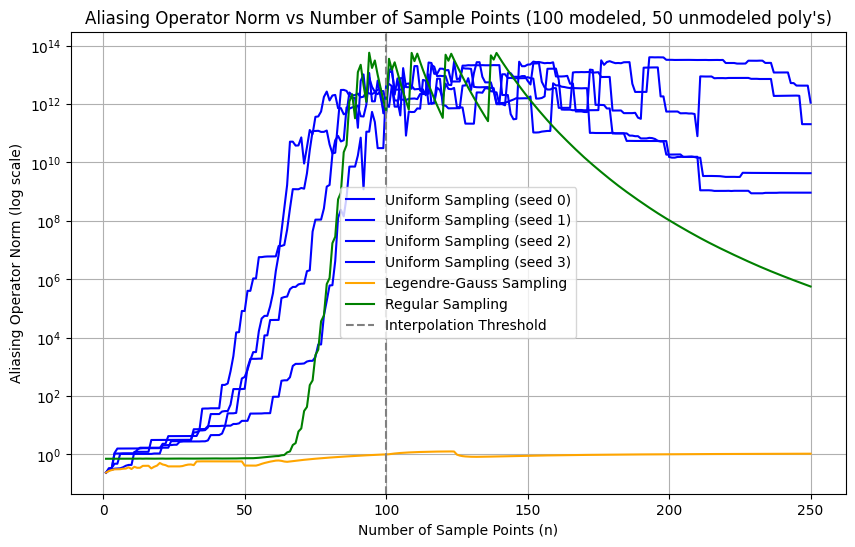

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), norms_uniform_seed_0, label="Uniform Sampling (seed 0)", color="blue")
plt.plot(range(1, n+1), norms_uniform_seed_1, label="Uniform Sampling (seed 1)", color="blue")
plt.plot(range(1, n+1), norms_uniform_seed_2, label="Uniform Sampling (seed 2)", color="blue")
plt.plot(range(1, n+1), norms_uniform_seed_3, label="Uniform Sampling (seed 3)", color="blue")

plt.plot(range(1, n+1), norms_legendre, label="Legendre-Gauss Sampling", color="orange")
plt.plot(range(1, n+1), norms_regular, label="Regular Sampling", color="green")
plt.axvline(x=modeled_functions, color="gray", linestyle="--", label="Interpolation Threshold")
plt.yscale("log")
plt.xlabel("Number of Sample Points (n)")
plt.ylabel("Aliasing Operator Norm (log scale)")
plt.title(f"Aliasing Operator Norm vs Number of Sample Points ({modeled_functions} modeled, {m-modeled_functions} unmodeled poly's)")
plt.legend()
plt.grid(True)
plt.show()
